<a href="www.qstom-it.com"><img style="text-align:center" src="https://qstom-it.com/wp-content/uploads/2019/04/logo.png"></img></a>
<h1 style="text-align:center"> MODELISATION DES EPIDEMIES</h1>
<h2 style="text-align:center"> Grippe H1N1 dans la province du Guangdong - 2009</h2>
<h2 style="text-align:center"> Coronavirus MERS en Corée du sud - 2015</h2>

Nous allons voir comment il nous est possible de modéliser l'évolution d'une épidémie afin de prédire le nombre de malades potentiels et permettre aux pouvoirs publics d'agir en conséquence.

Deux cas d'étude ont été choisis:
>La grippe H1N1 qui a sévi dans la province du Guangdong en 2009 car de nombreuses informations peuvent être trouvées à son sujet.  
  
>Le coronavirus MERS (Middle East Respiratory Syndrome) déclaré en 2015 en Corée du sud.

<b>Attention !</b>  
Les informations utilisées dans ce tutoriel n'ont pour objectif que d'être utilisées de le cadre d'études. Elles sont issues de différentes recherches et doivent être restreintes à un cadre de <b>simulation</b> et non à l'application et la déduction sur des phénomènes épidémiologiques réels. Nous ne sommes ni médecin, ni épidémiologiste et ne pouvons affirmer avec certitude que les données utilisées dans les différents modèles sont exactes. L'objectif de ce tutoriel étant avant tout de démontrer comment il est possible de modéliser une évolution épidémique à l'aide de modèles mathématiques. 
  



## Modéliser à l'aide de compartiments

C'est en 1980 que sont nés les modèles épidémiologiques par compartiments, dans le but d'étudier la maladie du VIH.  
  
Un modèle épidémiologique est composé de deux parties :  
- De compartiments
- De règles de passage d'un compartiment à un autre 
  
Les compartiments divisent la population (N) dans les différents états possibles par rapport à la maladie (Cf schéma ci-dessous). Par exemple :  
- S = Personnes saines
- E = Personnes exposées à l'épidémie
- I = Personnes infectées
- R = Personnes guéries
Il existe également d'autres compartiments tel que D pour les personnes décédées.
  
Les règles permettent de définir les proportions des individus d'une population passant d'un compartiment à un autre. Par exemple :
- Le taux d'infection (Beta) permettant de passer de S à E
- Le taux d'incubation (Sigma) permettant de passer de E à I
- Le taux de guérison (Delta) permettant de passer de I à R

D'autres notions sont également à prendre en compte :
- Le taux de reproduction de base noté R0. Si R0 > 1 alors l'épidémie peut se propager dans la population
- On peut ajouter au modèle des variables nommées u (mu) et v (nu) pour prendre en compte respectivement les taux de mortalité d'une population non liée à la maladie et le taux de vaccination.  
  
> Dans les modèles que nous allons établir, nous émettons l'hypothèse que la population ne change pas au fil du temps : Naissance, décés, déplacements... ce qui n'est pas le cas lors d'un phénomène réel



<img src="https://institutefordiseasemodeling.github.io/Documentation/general/_images/SEIR-SEIRS.png"></img>

## Quelques formules mathématiques

Voici à présent les formules mathématiques permettant de réaliser des prédictions sur l'évolution d'une épidémie dans le cadre d'un modèle épidémiologique SEIR :

<img src="http://www.public.asu.edu/~hnesse/classes/seireqn.png"></img>

Nous sommes en présence d'équations différentielles. Pour rappel, une équation différentielle est une équation où l’inconnue est une fonction, et qui se présente sous la forme <b>d’une relation entre cette fonction et ses dérivées</b>.
Prenons l'exemple du compartiment S.  Nous mettons en relation à l'aide du signe = la dérivée de la fonction S (dS/dt) avec son équation, il s'agit donc bien d'une équation différentielle.  

Pour les résoudre à l'aide du langage Python, nous allons utiliser la fonction odeint du module scipy.integrate. Mais avant cela, nous devons écrire une fonction reprenant les différentes formules énoncées précédemment.

In [172]:
#Fonction de résolution
def SEIR (vecteurDeDonnees, t, N, tauxInfection, tauxIncubation, tauxGuerrison, tauxDeMortalite, tauxDeVaccination):
    S, E,I,R = vecteurDeDonnees #On récupere les valeurs S0, E0, I0 et R0 passées en paramètre
    dSdt = tauxDeMortalite * (N-S) - tauxInfection * ((S*I)/N) - tauxDeVaccination*S
    dEdt = tauxInfection * ((S*I)/N) - (tauxDeMortalite+tauxIncubation)*E
    dIdt = (tauxIncubation * E) - (tauxDeMortalite+tauxGuerrison) * I
    dRdt = (tauxGuerrison * I) + tauxDeMortalite*R + tauxDeVaccination*S
  
    return dSdt, dEdt, dIdt, dRdt


## Modélisation de la grippe H1N1 à l'aide du modèle SEIR (province du Guangdong - 2009) 

Nous allons à présent paramétrer les éléments de notre modèle en fonction des données épidémiologiques. Il s'agit d'une tâche assez compliquée car la pluspart de ces données sont difficiles à obtenir, notamment le taux d'infection (beta).   
Pour y parvenir, nous nous sommes appuyés sur ce document https://www.sciencedirect.com/science/article/pii/S1201971212013112  nous permettant de définir les paramètres suivants concernant l'épidémie H1N1 :

In [173]:
N = 95440000 #Population de la province du Guangdong en 2009 
tauxInfection = 0.420 # Taux d'infection
tauxIncubation = 1/2.62 # Taux d'incubation
tauxGuerrison = 1/3.80 # Taux de guérison
tauxDeMortalite = 0
tauxDeVaccination = 0
nombreDeJoursDeSimulation = 365 #On décide de simuler l'évolution sur une année

#Etat de l'épidémie au premier jour
R0 = 0 # Aucune personne rétablie
I0 = 1 # 1 cas identifié
E0 = 0 # Aucune personne exposée
S0 = N - E0 - I0 - R0 #La population saine

### Exécution de la simulation

Selon ce document : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3154258/  
"On May 18, 2009 the first case of pH1N1 was detected by Guangdong CDC in Guangdong province. The epidemic in Guangdong reached its peak in November, and attenuated to baseline levels by late December, 2009." 
- Le début de l'épidémie a été constatée au mois de mai
- Le pic épidémique a été constaté au mois de novembre soit environ 210 jours plus tard
- L'épidémie diminue ensuite jusque fin d'année soit 240 jours plus tard

In [174]:
#Import des librairies nécessaires
from scipy.integrate import odeint
import numpy as np


#On crée un tableau linspace
# numpy.linspace(start, stop, num) 
# Ce tableau
#- comporte autant de lignes que le nombre de jours de simulation : num = 365 dans notre cas
#- les valeurs du tableau vont de 0 à 365 (Les deux premiers paramètres) car elles serviront dans les équations différentielles
# pour le paramètre t des dérivées dS/dt...
# Lors de la première itération t vaudra 0, t vaudra 1 pour la seconde itération... 
vecteurTemporel = np.linspace(0,nombreDeJoursDeSimulation,nombreDeJoursDeSimulation)

#Création d'un tableau contenant les valeurs S0,E0,I0 et R0 c'est à dire le nombre de personnes par compartiment
datas = np.array([S0,E0,I0,R0])

#Solutions des équations différentielles à l'aide de la méthode Odeint.
#Les réponses seront stockées dans le tableau "Vecteur Temporel". Ce tableau sert aussi de paramètre
#Les paramètres utiles à la résolution des équations sont passés à l'aide de l'instruction args
solutions = odeint(SEIR,
                  datas,
                  vecteurTemporel, 
                  args=(N, tauxInfection, tauxIncubation, tauxGuerrison,tauxDeMortalite, tauxDeVaccination) )



In [175]:
#On transpose la matrice et on stocke chaque résultat dans des tableaux
S, E, I, R = solutions.T
S

array([95439999.        , 95439998.62073237, 95439998.2858734 ,
       95439997.95935893, 95439997.62266959, 95439997.26565135,
       95439996.88207965, 95439996.46751107, 95439996.01823714,
       95439995.53076921, 95439995.0015784 , 95439994.42695752,
       95439993.80294073, 95439993.12525013, 95439992.38925384,
       95439991.5899281 , 95439990.72182007, 95439989.77900928,
       95439988.75506662, 95439987.64301014, 95439986.43525699,
       95439985.12357205, 95439983.69901155, 95439982.15186206,
       95439980.47157438, 95439978.64669143, 95439976.66477025,
       95439974.5122971 , 95439972.17459534, 95439969.63572547,
       95439966.87837633, 95439963.88374662, 95439960.6314175 ,
       95439957.09921312, 95439953.26304914, 95439949.0967687 ,
       95439944.57196413, 95439939.65778312, 95439934.32071842,
       95439928.52437937, 95439922.22924398, 95439915.39238887,
       95439907.96719727, 95439899.90304083, 95439891.14493449,
       95439881.63316157, 95439871.30286

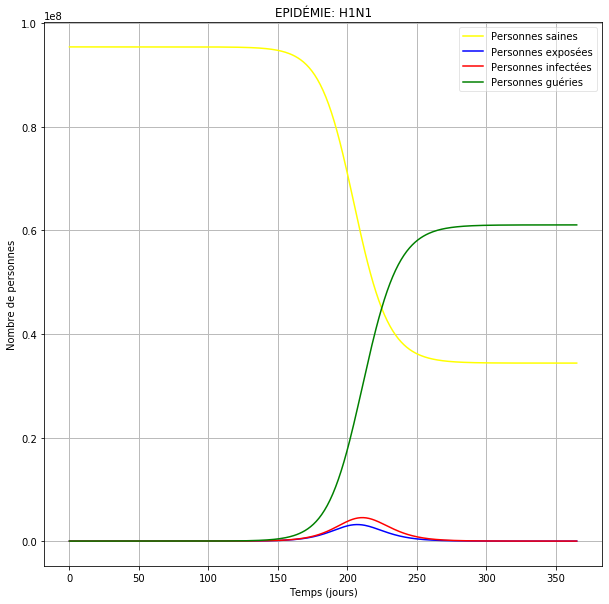

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
titre = "Epidémie: H1N1"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(vecteurTemporel,S,'yellow',label="Personnes saines")
plt.plot(vecteurTemporel,E,'blue',label="Personnes exposées")
plt.plot(vecteurTemporel,I,'red',label="Personnes infectées")
plt.plot(vecteurTemporel,R,'green',label="Personnes guéries")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

Sur ce graphique, on constate qu'avec les paramètres utilisés, nous obtenons effectivement un pic vers le 210 jours.
  
A noter que les paramètres utilisés ont été calculés a posteriori par les équipes de recherche.  
Si nous modifions de quelques centièmes les paramètres, nous obtenons d'autres résultats qui parfois peuvent s'avérer incohérents vis à vis de la réalité. Seuls des spécialistes peuvent valider ou non le modèle.  

In [177]:
np.amax(I) #Nombre de cas grippaux constatés (On choisit la valeur maximale de I)

4531577.617658164

In [166]:
np.unravel_index(np.argmax(I), I.shape) #Jour du pic épidémique

(210,)

In [161]:
Taux_Reproduction_R0 = tauxInfection / tauxGuerrison
Taux_Reproduction_R0

1.596

Comme R0 > 1 l'épidémie peut donc se propager dans la population.

## Coronavirus MERS en Corée du sud - 2015

Penchons-nous à présent sur le cas du Coronavirus qui a sévi en 2015 en Corée du Sud.
  
A l'aide de ces documents :  
https://www.sciencedirect.com/science/article/pii/S0022519316302430  
http://www.koreascience.or.kr/article/JAKO201823954940175.page  
  
Nous pouvons établir les paramètres suivants : 


In [178]:
N = 51069000 #Population de corée du sud en 2015 
tauxInfection = 1.3 # Taux d'infection
tauxIncubation = 0.2 # Taux d'incubation
tauxGuerrison = 0.2 # Taux de guérison
tauxDeMortalite = 0
tauxDeVaccination = 0
nombreDeJoursDeSimulation = 365 

#Etat de l'épidémie au premier jour
R0 = 0 # Aucune personne rétablie
I0 = 3 # 3 cas identifiés
E0 = 2 # 2 personnes exposées
S0 = N - E0 - I0 - R0 #La population saine

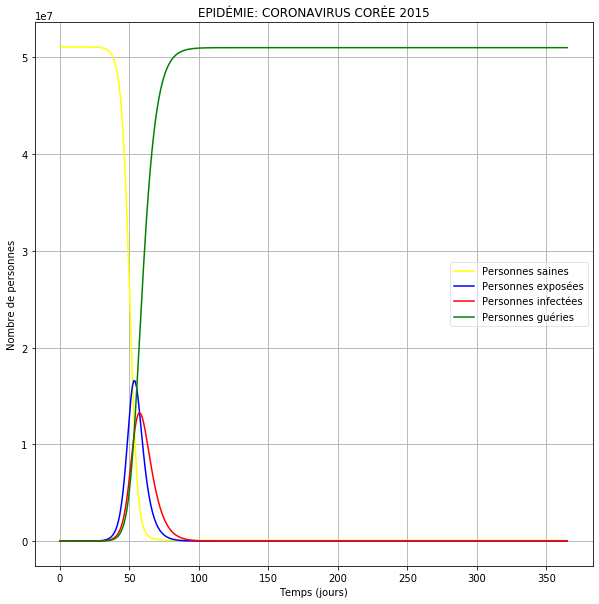

In [179]:
vecteurTemporel = np.linspace(0,nombreDeJoursDeSimulation,nombreDeJoursDeSimulation)

datas = np.array([S0,E0,I0,R0])

solutions = odeint(SEIR,
                  datas,
                  vecteurTemporel, 
                  args=(N, tauxInfection, tauxIncubation, tauxGuerrison,tauxDeMortalite, tauxDeVaccination) )

S, E, I, R = solutions.T

plt.figure(figsize=(10,10))
titre = "Epidémie: Coronavirus Corée 2015"
plt.title(titre.upper())
plt.autoscale(enable=True, axis='both', tight=None)
plt.plot(vecteurTemporel,S,'yellow',label="Personnes saines")
plt.plot(vecteurTemporel,E,'blue',label="Personnes exposées")
plt.plot(vecteurTemporel,I,'red',label="Personnes infectées")
plt.plot(vecteurTemporel,R,'green',label="Personnes guéries")
plt.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')

plt.xlabel('Temps (jours)')
plt.ylabel('Nombre de personnes')
legend = plt.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

In [180]:
np.amax(I) #Nombre de cas coronavirus constatés

13280090.023775049

In [139]:
Taux_Reproduction_R0 = tauxInfection / tauxGuerrison
Taux_Reproduction_R0

6.5

Le taux R0 (Taux de reproduction de base) est supérieur au H1N1 ce qui le rend trés contagieux, mais cohérent avec les informations médicales que nous avons récoltées sur le sujet avec un R0 < 7. (http://www.kjim.org/journal/view.php?number=170028).  
  
Ce taux de base de reproduction est comparable aux oreillons, rubéole, variole (https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie)

## Pour conclure
Bien entendu, nous ne disposons pas de moyens  ni des compétences médicales et épidémiologiques nécessaires pour vérifier ces différentes données.  
  
Cependant à l'aide de ce tutoriel nous avons pu découvrir comment à l'aide des modèles par compartiments, il est possible de prédire l'évolution d'une épidémie. N'oublions pas que ces modélisations sont réalisées dans des cas d'hypothèses ne reflétant pas la réalité (mobilité, naissance et décés de la population).  
  
Si vous souhaitez aller plus loin dans la compréhension de ces modèles et les tester sur différents cas, nous vous invitons à consulter ce site : https://institutefordiseasemodeling.github.io/Documentation/general/index.html 
